In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import pandas as pd
from nltk.parse.generate import generate
from nltk import CFG
from nltk.grammar import Nonterminal
from tqdm import tqdm

from eig.battleship import Parser

from battleship.grammar import BattleshipGrammar
from battleship.scoring import compute_score_parallel
from battleship.board import Board

# Battleship grammar

In [44]:
grammar = BattleshipGrammar(include_lambdas=False)

## Enumeration

In [6]:
valid, invalid = grammar.generate(n=int(1e6), depth=5, start=Nonterminal('A'))
print('Valid programs:', len(valid))
print('Invalid programs:', len(invalid))

100%|██████████| 2/2 [00:00<00:00, 53773.13it/s]

Valid programs: 860939
Invalid programs: 27671


In [5]:
# Pass `enforce_type=False` to `Parser.parse` to allow all toplevel types
program = Parser.parse("( and TRUE ( touch Red Blue ) )", enforce_type=False)

In [6]:
program.to_dict()

{'type': 'and_op',
 'children': [{'type': 'boolean', 'value': True},
  {'type': 'touch_fn',
   'children': [{'type': 'color', 'value': 2},
    {'type': 'color', 'value': 1}]}]}

### Scoring

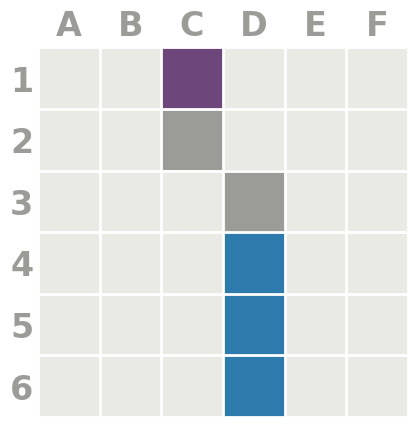

In [9]:
board = Board.from_trial_id(5)
board

In [10]:
programs = valid

In [11]:
scores = compute_score_parallel(programs=programs, board=board)

100%|██████████| 860939/860939 [00:44<00:00, 19357.89it/s]


In [12]:
df_scores = pd.DataFrame({"program": programs, "score": scores})
df_scores.sort_values("score", ascending=False).head(10)

,program,score
860837,( setSize ( coloredTiles Water ) ),2.114224
645562,( + ( size Red ) ( size Purple ) ),2.114224
645851,( + ( size Purple ) ( size Red ) ),2.114224
839223,( - ( size Red ) ( size Purple ) ),2.101558
839512,( - ( size Purple ) ( size Red ) ),2.101558
839447,( - ( size Purple ) ( - 3 6 ) ),1.568196
778323,( - 5 ( size Purple ) ),1.568196
839448,( - ( size Purple ) ( - 3 7 ) ),1.568196
839449,( - ( size Purple ) ( - 3 8 ) ),1.568196
637732,( + ( - 7 4 ) ( size Purple ) ),1.568196


In [13]:
df_scores[df_scores["score"] > 0].sort_values("score", ascending=False)

,program,score
645851,( + ( size Purple ) ( size Red ) ),2.114224
860837,( setSize ( coloredTiles Water ) ),2.114224
645562,( + ( size Red ) ( size Purple ) ),2.114224
839512,( - ( size Purple ) ( size Red ) ),2.101558
839223,( - ( size Red ) ( size Purple ) ),2.101558
...,...,...
107905,( and ( touch Red Blue ) ( touch Purple Red ) ),0.116604
109225,( and ( touch Purple Red ) ( touch Red Blue ) ),0.116604
109223,( and ( touch Purple Red ) ( touch Blue Red ) ),0.116604
413422,( == ( color 1D ) Red ),0.083901


array([[<Axes: title={'center': 'score'}>]], dtype=object)

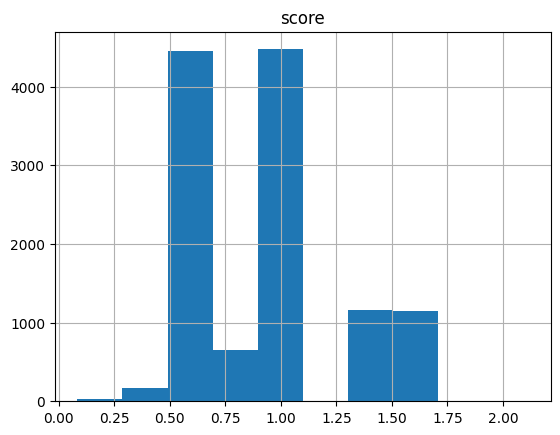

In [14]:
df_scores[df_scores["score"] > 0].hist()

In [15]:
df_scores[df_scores["program"].str.contains("lambda")]

,program,score


## Sampling

In [45]:
program = grammar.sample(grammar.grammar, ["S"])
program


TypeError: BattleshipGrammar.sample() takes from 1 to 2 positional arguments but 3 were given

In [33]:
samples = [grammar.sample() for _ in range(10)]

In [34]:
samples

['2C',
 '(',
 '4E',
 'Water',
 'H',
 '1E',
 '( ( ( 0 ( ( 2E ( Red',
 '( Red',
 '3B',
 '2']